<a href="https://colab.research.google.com/github/AnetaCzy/PUM/blob/main/5_03_CreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)


Wczytanie danych

In [84]:
df_train = pd.read_csv('train.csv')
# df_train.head(5)

<ipython-input-84-39ad0de2a370>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


Podstawowe informacje

In [85]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [86]:
df_train.shape


(100000, 28)

Typy danych

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [88]:
df_train.head(1)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


In [89]:
df_train = df_train.astype(str)

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        100000 non-null  object
 1   Customer_ID               100000 non-null  object
 2   Month                     100000 non-null  object
 3   Name                      100000 non-null  object
 4   Age                       100000 non-null  object
 5   SSN                       100000 non-null  object
 6   Occupation                100000 non-null  object
 7   Annual_Income             100000 non-null  object
 8   Monthly_Inhand_Salary     100000 non-null  object
 9   Num_Bank_Accounts         100000 non-null  object
 10  Num_Credit_Card           100000 non-null  object
 11  Interest_Rate             100000 non-null  object
 12  Num_of_Loan               100000 non-null  object
 13  Type_of_Loan              100000 non-null  object
 14  Delay

In [91]:
for col in df_train.columns:
    df_train[col] = df_train[col].str.rstrip('_')

In [92]:
for col in df_train.columns:
    df_train[col] = df_train[col].str.rstrip('__')

In [93]:
print(columns_to_convert)

['Age', 'Num_of_Loan', 'Annual_Income', 'Amount_invested_monthly', 'Monthly_Balance', 'Total_EMI_per_month', 'Outstanding_Debt']


In [94]:
df_train = df_train.replace(r'^__', '', regex=True)


In [ ]:
#susnąć nan wartością średnią

In [95]:
df_train[columns_to_convert] = df_train[columns_to_convert].apply(pd.to_numeric)

ValueError: Unable to parse string "nan" at position 60

In [58]:
#age for int
# Num_of_Loan to int
#annual_income float
#Amount_invested_monthly to float
#monthlly_balance to float
#Total_EMI_per_month to float
#Outstanding_Debt to float

df_train[['Age','Num_of_Loan','Annual_Income','Amount_invested_monthly','Monthly_Balance','Total_EMI_per_month','Outstanding_Debt']] = df_train[['Annual_Income','Amount_invested_monthly','Monthly_Balance','Total_EMI_per_month','Outstanding_Debt']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            100000 non-null  float64
 1   Amount_invested_monthly  95521 non-null   float64
 2   Monthly_Balance          98800 non-null   float64
 3   Total_EMI_per_month      100000 non-null  float64
 4   Outstanding_Debt         100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


In [60]:
df_train.describe()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,100000,0,100000,100000,0,100000,100000,100000,100000,0,100000,100000,100000,100000,100000,100000,0,100000,100000,100000,0,0,100000,0,100000
unique,100000,12500,8,10140,0,12501,16,0,13236,943,1179,1750,0,6261,73,712,4384,1224,4,0,100000,405,3,0,0,7,0,3
top,0x1602,CUS_0xd40,January,nan,NaN,#F%$D@*&8,,NaN,nan,6,5,8,NaN,nan,15,nan,,4.0,Standard,NaN,26.822619623699016,nan,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,1,8,12500,9985,NaN,5572,7062,NaN,15002,13001,18459,5012,NaN,11408,3596,7002,2091,11271,36479,NaN,1,9030,52326,NaN,NaN,25513,NaN,53174


In [16]:
df_train['Credit_Score'].isna().sum()


0

In [17]:
df_train.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


Usunięcie duplikatów

In [23]:
df_train.drop_duplicates()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [25]:
df_train.shape

(100000, 28)

In [61]:
for i in df_train.columns:
  print(df_train[i].value_counts())
  print('*'*50)

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
**************************************************
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
**************************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
**************************************************
nan               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: Name, Length:

<Axes: xlabel='count', ylabel='Credit_Score'>

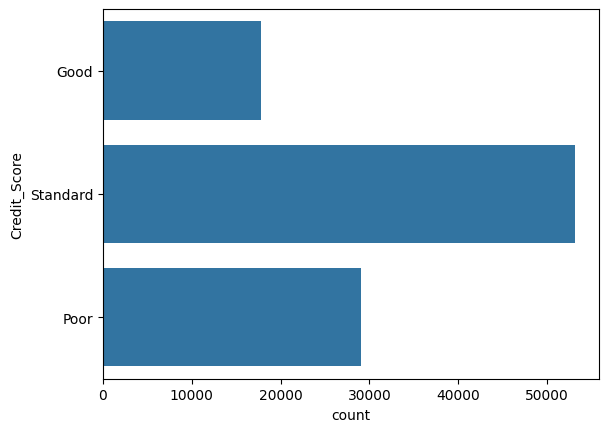

In [72]:
credit_scr_chart = sns.countplot(df_train['Credit_Score'])
credit_scr_chart

In [73]:
df_train.isna().sum()

ID                               0
Customer_ID                      0
Month                            0
Name                             0
Age                         100000
SSN                              0
Occupation                       0
Annual_Income               100000
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                 100000
Type_of_Loan                     0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt            100000
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month         100000
Amount_invested_monthly     100000
Payment_Behaviour                0
Monthly_Balance             100000
Credit_Score                     0
dtype: int64

In [79]:
df_train['Monthly_Balance'].describe()


count       0
unique      0
top       NaN
freq      NaN
Name: Monthly_Balance, dtype: object

In [81]:
df_train.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,None,821-00-0265,Scientist,None,1824.8433333333328,3,4,3,None,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,,None,26.822619623699016,22 Years and 1 Months,No,None,None,High_spent_Small_value_payments,None,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,None,821-00-0265,Scientist,None,nan,3,4,3,None,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,nan,11.27,4.0,Good,None,31.94496005538421,nan,No,None,None,Low_spent_Large_value_payments,None,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,None,821-00-0265,Scientist,None,nan,3,4,3,None,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,,4.0,Good,None,28.60935202206993,22 Years and 3 Months,No,None,None,Low_spent_Medium_value_payments,None,Good


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Monthly_Inhand_Salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Delay_from_due_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Delay_from_due_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Delay_from_due_date'}, axis=1)
              .sort_values('Delay_from_due_date', ascending=True))
  xs = counted['Delay_from_due_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Delay_from_due_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Delay_from_due_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Delay_from_due_date'}, axis=1)
              .sort_values('Delay_from_due_date', ascending=True))
  xs = counted['Delay_from_due_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Delay_from_due_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Month')):
  _plot_series(series, series_name, i)
  fig.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Delay_from_due_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Delay_from_due_date'}, axis=1)
              .sort_values('Delay_from_due_date', ascending=True))
  xs = counted['Delay_from_due_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Delay_from_due_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Monthly_Inhand_Salary')):
  _plot_series(series, series_name, i)
  fig.legend(title='Monthly_Inhand_Salary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Delay_from_due_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Delay_from_due_date'}, axis=1)
              .sort_values('Delay_from_due_date', ascending=True))
  xs = counted['Delay_from_due_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Delay_from_due_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Delay_from_due_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Delay_from_due_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Month'].value_counts()
    for x_label, grp in _df_8.groupby('ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ID')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly_Inhand_Salary'].value_counts()
    for x_label, grp in _df_9.groupby('Month')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Month')
_ = plt.ylabel('Monthly_Inhand_Salary')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Delay_from_due_date'].value_counts()
    for x_label, grp in _df_10.groupby('Monthly_Inhand_Salary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly_Inhand_Salary')
_ = plt.ylabel('Delay_from_due_date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Num_of_Delayed_Payment'].value_counts()
    for x_label, grp in _df_11.groupby('Delay_from_due_date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('Num_of_Delayed_Payment')